<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/CONVU_Numeros_NOV_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 67s 35ms/step - loss: 0.1469 - accuracy: 0.9545 - val_loss: 0.0464 - val_accuracy: 0.9840
Epoch 2/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0464 - accuracy: 0.9854 - val_loss: 0.0304 - val_accuracy: 0.9898
Epoch 3/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0342 - accuracy: 0.9890 - val_loss: 0.0394 - val_accuracy: 0.9878
Epoch 4/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0257 - accuracy: 0.9925 - val_loss: 0.0313 - val_accuracy: 0.9906
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.0265 - accuracy: 0.9916

Exactitud en el conjunto de prueba: 0.991599977016449
313/313 [==============================] - 3s 8ms/step


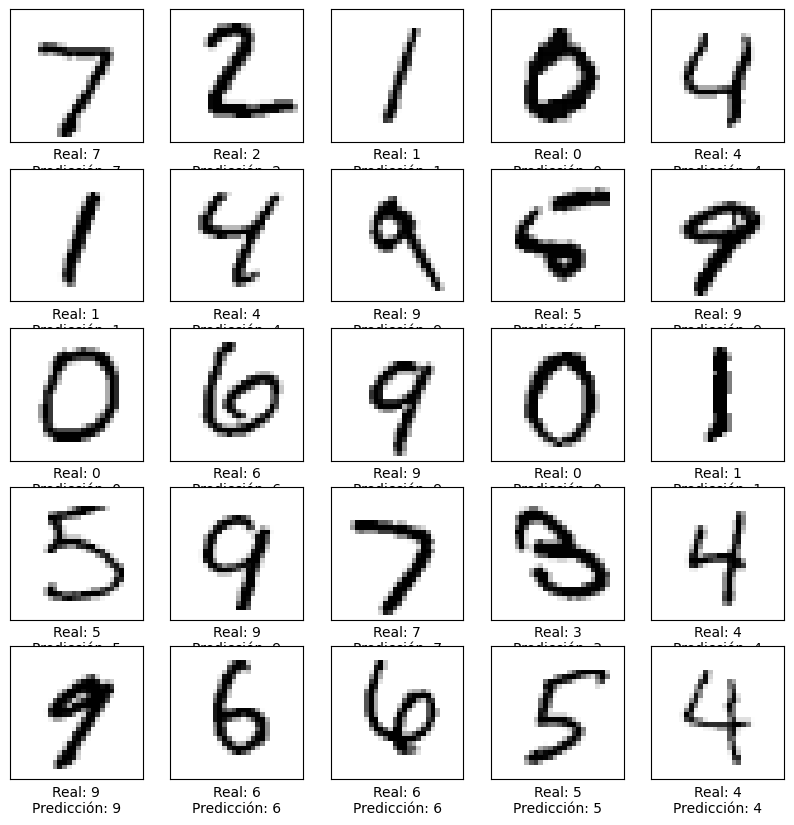

In [1]:
# Paso 1: Importar las bibliotecas necesarias
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Paso 2: Cargar y preprocesar los datos (ejemplo con el conjunto de datos MNIST)
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalizar los valores de píxeles al rango [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Paso 3: Construir la arquitectura de la CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Paso 4: Añadir capas densas para la clasificación
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Paso 5: Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Paso 6: Entrenar el modelo
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nExactitud en el conjunto de prueba: {test_acc}')

# Paso 8: Hacer predicciones
predictions = model.predict(test_images)

# Puedes visualizar algunas predicciones
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f'Real: {test_labels[i]}\nPredicción: {tf.argmax(predictions[i])}')
plt.show()
